Gradient descent is a powerful optimization algorithm used in machine learning to minimize a function, often a cost or loss function, by iteratively adjusting parameters

It works by moving in the direction of the steepest descent of the function, like rolling a ball down a hill to reach the lowest point. This process helps machine learning models learn by adjusting their parameters to minimize errors in predictions

* in multiple linear regression we can calculate the value of m and b using a closed form solution but in higher dimension it get costly as its costly to calculate the inverse at higher dimension so it fails in higher dimension so we use gradient descent

* it is a technique to calculate minima 
* its not only for linear regression or machine learning , its important for deeplearning


### Types of gradient descent
* batch gd
* sgd 
* mini batch gradient descent

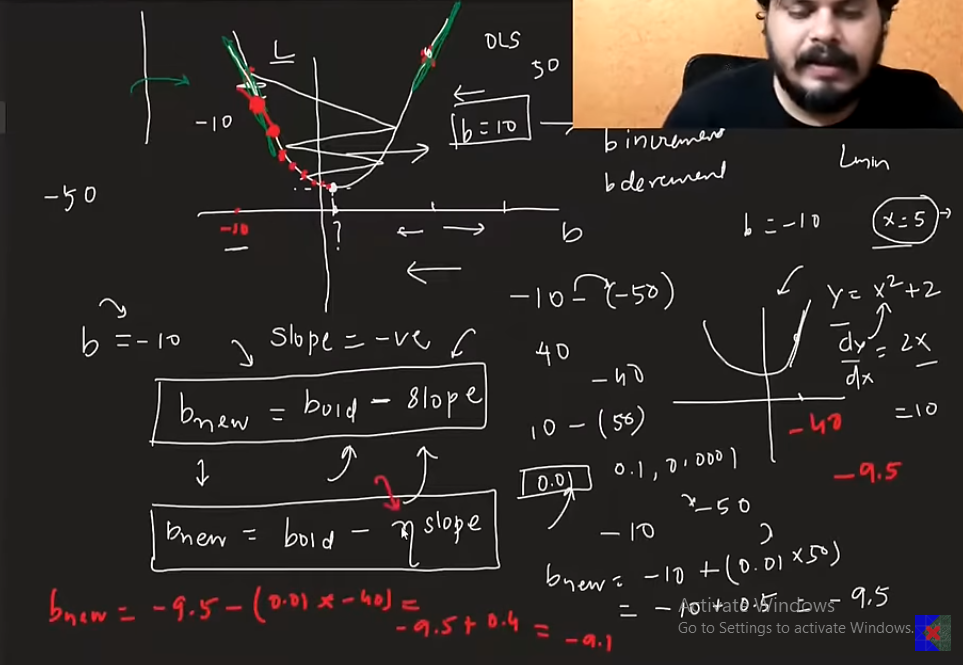

gradient means derivative,  when the lose function is dependt on 1 variable its called derivative but when theres two variable its called gradient.

step 1 is to take a random value of b and iterate 

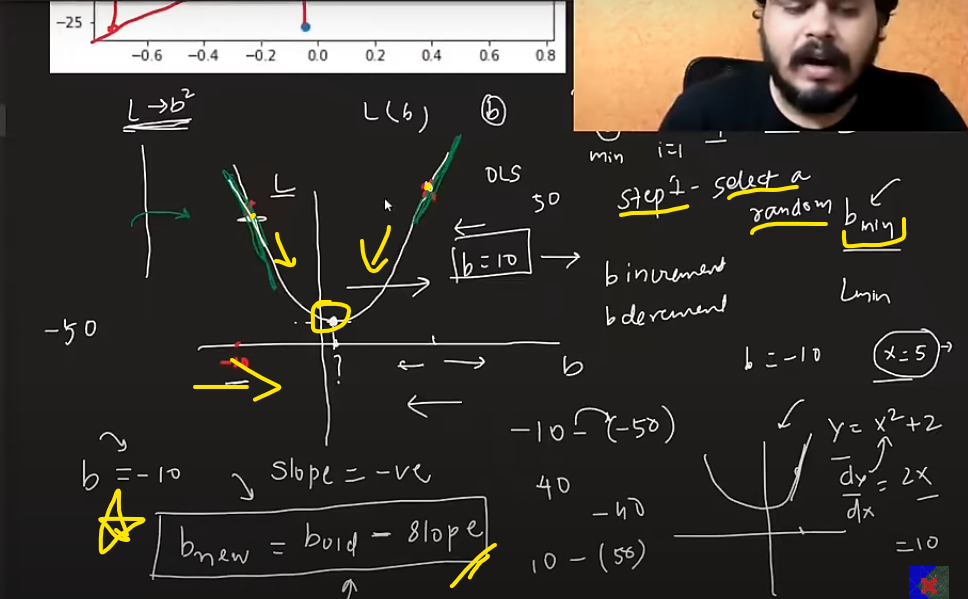

* bnew = b(old) - n(slope) where n is learning rate
* learning rate is generally 0.01
* iteration is called epochs
* when to stop the iteration when the difference is very minimum..
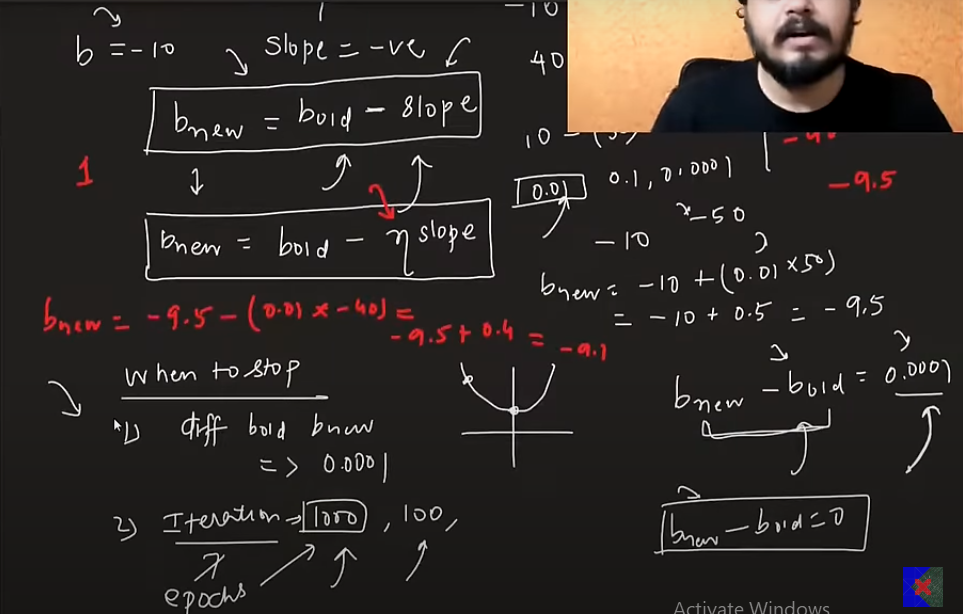

# lets try to find the best fit line using gradient decesent 
* taking m=78.35 fixed (for easy)
* taking b=0 or any random value (not fixed)
so we have a fixed m and we need to find the intercept (b) value

* step-1 start with a random b =b value
* taking a number of epoches 1000 or 100 ..
* lets learning rate n = 0.01
* bnew = b old - learningrate * slope ( we have all but not slope ka value at b=b)

* to find slope value -> in the formula of loss function L we differentiat w.r.t b and then we get the (equation of slope) at b=b
* each time we will calculate the slope at b=b and find bnew = bold - n*slope

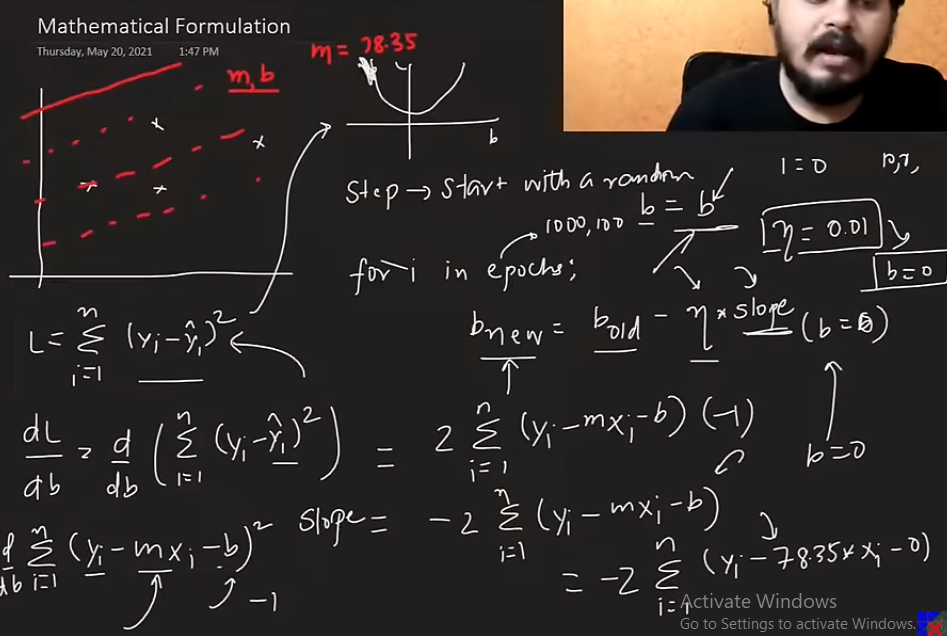

# coding

In [1]:
from sklearn.datasets import make_regression  # for creating a dataset
import numpy as np

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

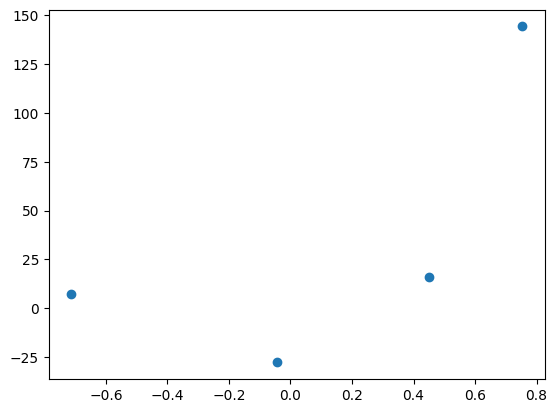

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [ ]:
# Lets apply OLS
# just to get the value of m and b so that when we apply gradient descent we can check the value
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X,y) #training

LinearRegression()

In [ ]:
reg.coef_ # (m)

array([78.35063668])

In [ ]:
reg.intercept_ #(b)

26.15963284313262

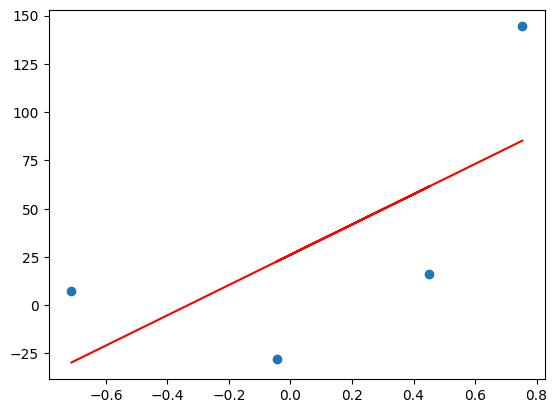

In [9]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red')

# now we will apply Gradient Descent starting with a random value of b=0 and assumming slope is constant m=78.35

In [13]:
#calculating the y_pred for the four random points that we have
y_pred = ((78.35 * X) + 0)

In [14]:
y_pred

array([[-55.81580837],
       [ 35.39949674],
       [ -3.48681619],
       [ 59.05759577]])

In [15]:
y_pred = y_pred.reshape(4)

In [17]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

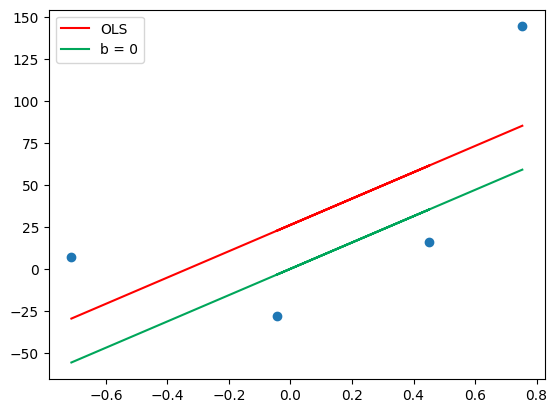

In [19]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS') # from ols (the actual line)
plt.plot(X, y_pred, color='#00a65a', label='b = 0') # for b=0 we are currently at the greenline need to reach to the red line through iteration gradient descent
plt.legend()
plt.show()

In [20]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope
# using the below formula to 

-209.27763408209216

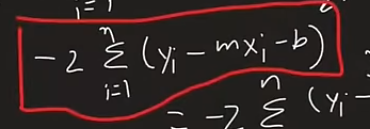

# step size is = learning rate(n) * slope
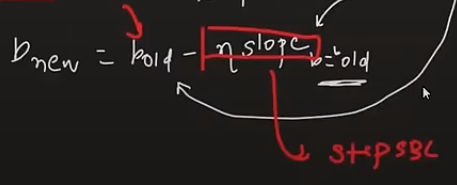

In [21]:
#lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

-20.927763408209216

In [22]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

In [23]:
y_pred1 = ((78.35 * X) + b).reshape(4)

y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

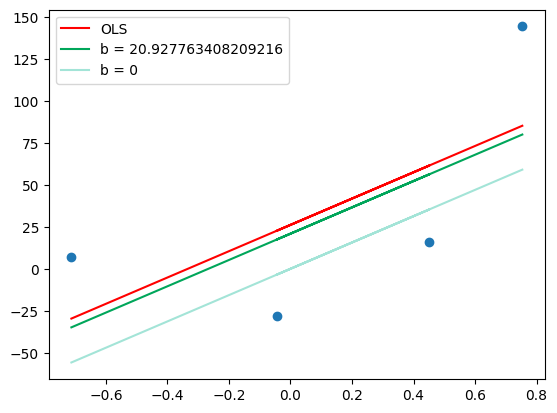

In [26]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS') #from ols model the ideal
plt.plot(X, y_pred1, color='#00a65a', label='b = {}'.format(b)) # currrently where we stand
plt.plot(X, y_pred, color='#A3E4D7', label='b = 0') # previously where we were
plt.legend()
plt.show()

In [27]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [28]:
step_size = loss_slope * lr
step_size

-4.185552681641844

In [29]:
b = b - step_size
b

25.11331608985106

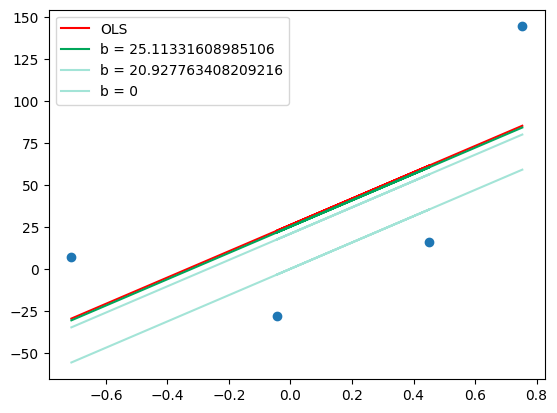

In [35]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X, y) #to plot the points
plt.plot(X, reg.predict(X), color = 'red', label='OLS')
plt.plot(X, y_pred2, color='#00a65a', label = 'b = {}'.format(b))
plt.plot(X, y_pred1, color='#A3E4D7', label='b = {}'.format(20.927763408209216))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 0')
plt.legend()
plt.show()

In [36]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [37]:
step_size = lr*loss_slope
step_size

-0.8371105363283675

In [38]:
b = b - step_size
b

25.95042662617943

In [39]:
y_pred3 = ((78.35 * X) + b).reshape(4)

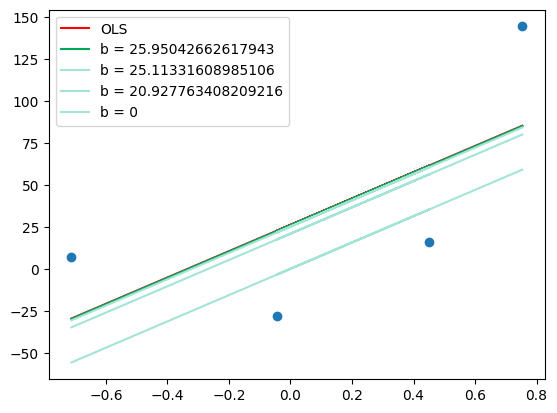

In [ ]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred3, color='#00a65a', label = 'b = {}'.format(b))
plt.plot(X, y_pred2, color='#A3E4D7', label='b = {}'.format(25.11331608985106
))
plt.plot(X, y_pred1, color='#A3E4D7', label='b = {}'.format(20.927763408209216))

plt.plot(X, y_pred, color='#A3E4D7', label='b = {}'.format(0))

plt.legend()
plt.show() 

# lets do this using epoches

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


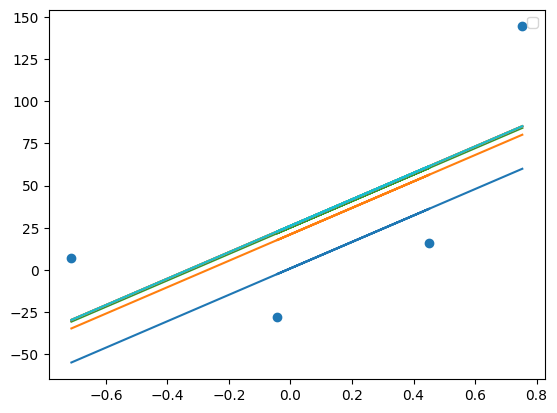

In [52]:
b = -100 #(randomly)
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)
    y_pred = m*X + b

    plt.plot(X, y_pred)

# plt.plot(X, reg.predict(X), color='red', label='OLS')

plt.scatter(X,y)
plt.legend()
plt.show()


### note:- if learning rate is small then it takes time to reach but u will reach there.. but if learning rate is high then may be ull never reach there...